In [3]:
import pandas as pd

from model import init_utils
from model import processing
# Experiments
from model import run
from model.plot_utils import *

########## AGENT CONFIGURATION ##########
# key -> token name, value -> token amount owned by agent
# note that token name of 'omniABC' is used for omnipool LP shares of token 'ABC'
# omniHDXABC is HDX shares dedicated to pool of token ABC

trader = {'HDX': 1000000, 'R1': 1000000, 'R2': 1000000}

# key -> agent_id, value -> agent dict
agent_d = {'Trader': trader}

########## ACTION CONFIGURATION ##########

action_dict = {
    'sell_r2_for_r1': {'token_buy': 'R1', 'token_sell': 'R2', 'amount_sell': 5000, 'action_id': 'Trade',
                       'agent_id': 'Trader'},
    'sell_r1_for_r2': {'token_sell': 'R1', 'token_buy': 'R2', 'amount_sell': 1000, 'action_id': 'Trade',
                       'agent_id': 'Trader'}
}

# list of (action, number of repetitions of action), timesteps = sum of repititions of all actions
trade_count = 1000
action_ls = [('trade', trade_count)]

# maps action_id to action dict, with some probability to enable randomness
prob_dict = {
    'trade': {'sell_r2_for_r1': 0.5,
              'sell_r1_for_r2': 0.5}
}

########## CFMM INITIALIZATION ##########
with open(r"./select_model.txt") as f:
        contents = f.readlines()
        if contents[0]=="Model=Omnipool_reweighting":
            initial_values = {
                'token_list': ['R1','R2'],
                'R': [500000,1500000],
                'P': [2,2/3],
                'fee_assets': 0,
                'fee_HDX': 0, 
                'a': [1, 1]
            }
        else:
            initial_values = {
                'token_list': ['R1','R2'],
                'R': [500000,1500000],
                'P': [2,2/3],
                'fee_assets': 0,
                'fee_HDX': 0
            }
            

############################################ SETUP ##########################################################

config_params = {
    'cfmm_type': "",
    'initial_values': initial_values,
    'agent_d': agent_d,
    'action_ls': action_ls,
    'prob_dict': prob_dict,
    'action_dict': action_dict,
}

config_dict, state = init_utils.get_configuration(config_params)

pd.options.mode.chained_assignment = None  # default='warn'
pd.options.display.float_format = '{:.2f}'.format

run.config(config_dict, state)
events = run.run()

rdf, agent_df = processing.postprocessing(events)

print(agent_df.tail(20))




                  ___________    ____
  ________ __ ___/ / ____/   |  / __ \
 / ___/ __` / __  / /   / /| | / / / /
/ /__/ /_/ / /_/ / /___/ ___ |/ /_/ /
\___/\__,_/\__,_/\____/_/  |_/_____/
by cadCAD

Execution Mode: local_proc
Configuration Count: 2
Dimensions of the first simulation: (Timesteps, Params, Runs, Vars) = (1000, 3, 1, 3)
Execution Method: local_simulations
SimIDs   : [0, 1]
SubsetIDs: [0, 0]
Ns       : [0, 0]
ExpIDs   : [0, 0]
Execution Mode: parallelized
Total execution time: 0.60s
      simulation  subset  run  substep  timestep agent_label          q  s-0  \
3963           1       0    1        2       981      Trader 1000000.00    0   
3965           1       0    1        2       982      Trader 1000000.00    0   
3967           1       0    1        2       983      Trader 1000000.00    0   
3969           1       0    1        2       984      Trader 1000000.00    0   
3971           1       0    1        2       985      Trader 1000000.00    0   
3973           1

[0 1]


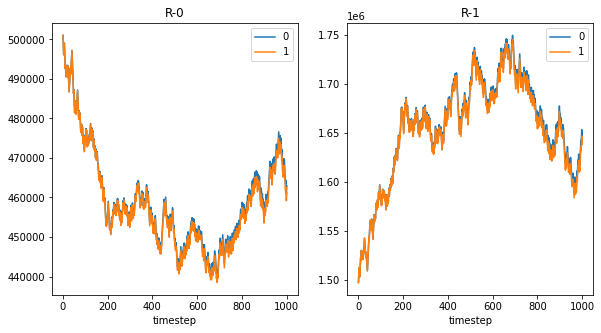

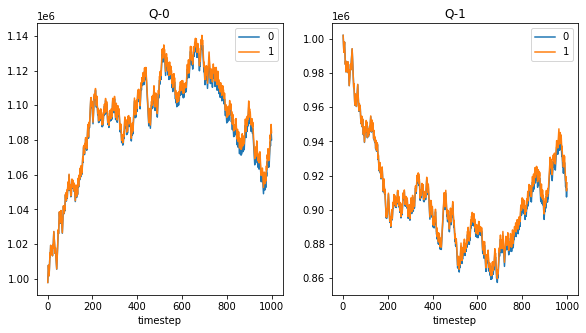

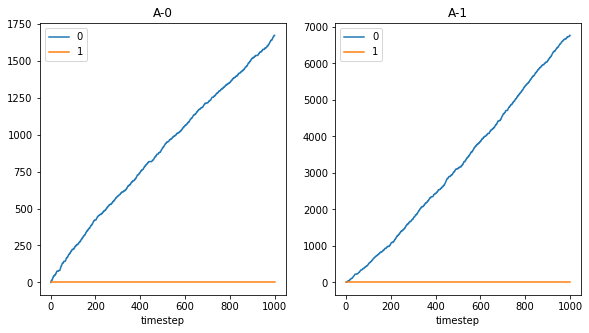

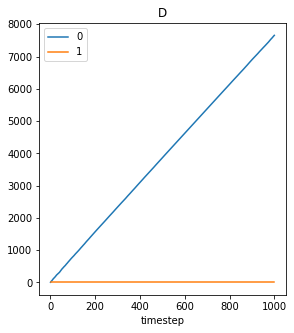

In [4]:

var_list = ['R', 'Q', 'A', 'D']
plot_vars(rdf, var_list)